#Project Breast Cancer Diagnosis 
*Emna Ben Kemla*


*October 2022*

#Table of Contents
1. Introduction
2. Understanding Our Data
3. Preprocessing
4. Visualization
5. Standardization 
6. Classification Models
    * KNN 
    * Logistic Regression
    * XGBOOST
    *AdaBoost
7. Models Accuracy Comparison
8. Conclusion




#Introduction

**Breast Cancer Diagnosis**

This project consists of an application of supervised machine learning classification models using the Breast Cancer Wisconsin (Diagnostic) Data Set.

The purpose is to both raise awareness of breast cancer, which is the most commonly diagnosed cancer in women and it is the second leading cause of death among them, and its examination and early detection which can lead to better treatment options and better chance of survival; and highlight the importance of machine learning in healthcare.

The Breast Cancer Wisconsin (Diagnostic) Data Set, which includes examples of cancer biopsies, will be used to detect whether the cancer diagnosis is "Benign" or "Malignant" by finding patterns and understanding relationships with the present laboratory measurements of digitized cell nucleis, through supervised machine learning classification algorithms. 

#Understanding our Data

Dataset Source:
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

The dataset can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29.


In [ ]:
 #importing the dataset from local drive
from google.colab import files


uploaded = files.upload()
import pandas as pd
import io
 
df = pd.read_csv(io.BytesIO(uploaded['breast-cancer.csv']),sep=",")

Saving breast-cancer.csv to breast-cancer.csv


In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


The variables in the dataset are:
"id" which is a unique numeric identifier for each patient in the data "Diagnois" which describes whether the tumor is diagnosed as "B" to indicate Benign (non cancerous) or "M" to indicate Melignant(non cancerous). 
The 30 real value variables describe 10 characteristics of a cell nuclei present in a digitized image of a fine needle aspirate (FNA) biopsy of a breast lump which are:
1 radius (mean of distances from center to points on the perimeter)
2 texture(standard deviation of gray-scale values)
3 perimeter
4 area
5 smoothness (local variation in radius lengths)
6 compactness(perimeter^2 / area - 1.0)
7 concavity(severity of concave portions of the contour)
8 concave points(number of concave portions of the contour)
9 symmetry
10 fractal_dimension("coastline approximation" - 1)

and the **mean**, **standard error** and **worst(mean of the three
largest values)** of these characteristics were computed for each image,
resulting in 30 features.

The variable id cannot be used for classification and the variable Diagnosis is our target

In [ ]:
print("The number of observations is: ",len(df))
print("The number of features is: ",len(df.columns)-2)  
print("they are: ")
f_names=[] #list of feature names
c=-1
for i in df:
    c+=1
    if c>1:
      print(c-1,i)
      f_names.append(i)
print("\n")
print("The target is 'Diagnosis'")

The number of observations is:  569
The number of features is:  29
they are: 
1 texture_mean
2 perimeter_mean
3 area_mean
4 smoothness_mean
5 compactness_mean
6 concavity_mean
7 concave points_mean
8 symmetry_mean
9 fractal_dimension_mean
10 radius_se
11 texture_se
12 perimeter_se
13 area_se
14 smoothness_se
15 compactness_se
16 concavity_se
17 concave points_se
18 symmetry_se
19 fractal_dimension_se
20 radius_worst
21 texture_worst
22 perimeter_worst
23 area_worst
24 smoothness_worst
25 compactness_worst
26 concavity_worst
27 concave points_worst
28 symmetry_worst
29 fractal_dimension_worst


The target is 'Diagnosis'


#Preprocessing

We will drop the variable id, since we won't be needing it for prediction.

In [ ]:
df.drop('id', inplace=True, axis=1)

In [ ]:
#Variables and the number of null values
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
print("The number of null values in the dataset is: ", df.isnull().sum().sum())

The number of null values in the dataset is:  0


In [ ]:
#showing information about our variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

The target "Diagnosis" is the only categorical variable that we have in the dataset .

In [ ]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

The target variable has two values B for Benign and M for Malignant.
We will turn the target into a numerical variable using one label encoder, where the value B takes the number 0, and M takes the number 1.

In [ ]:
df.replace({'diagnosis':{'B': 0,'M':1}},inplace=True)

In [ ]:
df["diagnosis"].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

#Visualization 

In this section we will show the distribution of our target variable "diagnosis", the distributions of the features that have high correlation with the target ,and plot these correlations.


In [ ]:
#Importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Distribution of the variable Diagnosis')

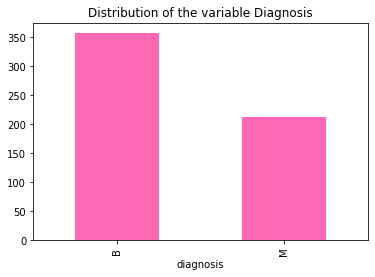

In [ ]:
#Distribution of the variable Diagnosis
vc=df["diagnosis"].value_counts()
vc.plot.bar(color='hotpink')
plt.xlabel("diagnosis")
plt.title("Distribution of the variable Diagnosis")

The number of observations diagnosed as benign (357) exceeds the number of observations diagnosed as malignant (212).



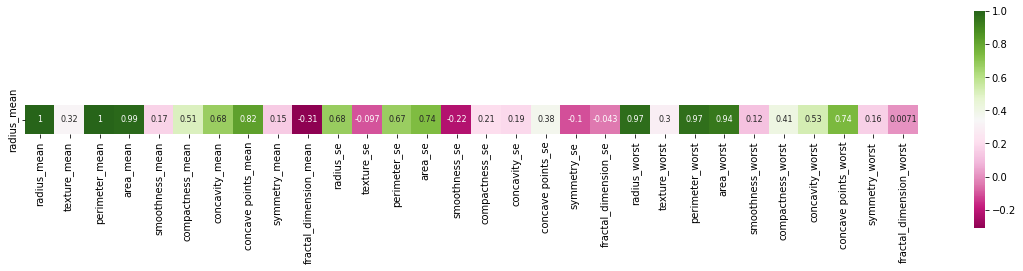

In [ ]:
#Showing correlations with the target diagnosis
correl=df.corr()
pr_cr=correl.iloc[0:1,0::]

pr_cr
s , ax = plt.subplots( figsize =( 20 , 40 ) )
s = sns.heatmap(pr_cr,cmap ="PiYG",square=True,cbar_kws={ 'shrink' : .1 },  ax=ax,  annot = True,  annot_kws = { 'fontsize' : 8} )

In [ ]:
#Features highly correlated with the target
high_corr=[] #list of names of features highly correlated with the target
print("The features that are highly correlated with the target Diagnosis (correlation >0.7) are:"+"\n")
n=0
for i in pr_cr:
  for j in pr_cr[i]:
    if abs(j) >0.7 and abs(j)<1:
      n+=1
      print(str(n)+" "+i)
      high_corr.append(i)



The features that are highly correlated with the target Diagnosis (correlation >0.7) are:

1 perimeter_mean
2 area_mean
3 concave points_mean
4 area_se
5 radius_worst
6 perimeter_worst
7 area_worst
8 concave points_worst


In [ ]:
#Distribution of these feature variables
df[high_corr].describe()

,perimeter_mean,area_mean,concave points_mean,area_se,radius_worst,perimeter_worst,area_worst,concave points_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,91.969033,654.889104,0.048919,40.337079,16.269190,107.261213,880.583128,0.114606
std,24.298981,351.914129,0.038803,45.491006,4.833242,33.602542,569.356993,0.065732
min,43.790000,143.500000,0.000000,6.802000,7.930000,50.410000,185.200000,0.000000
25%,75.170000,420.300000,0.020310,17.850000,13.010000,84.110000,515.300000,0.064930
50%,86.240000,551.100000,0.033500,24.530000,14.970000,97.660000,686.500000,0.099930
75%,104.100000,782.700000,0.074000,45.190000,18.790000,125.400000,1084.000000,0.161400
max,188.500000,2501.000000,0.201200,542.200000,36.040000,251.200000,4254.000000,0.291000


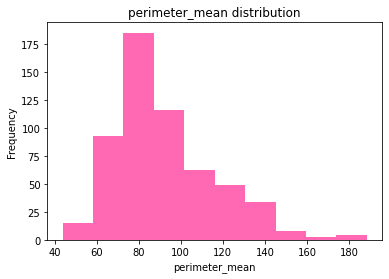

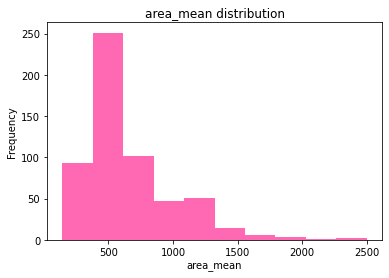

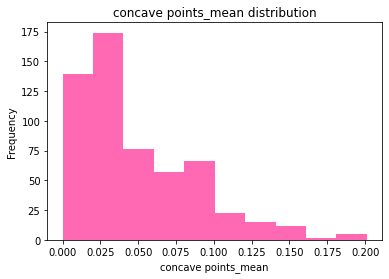

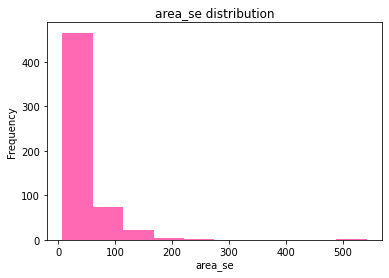

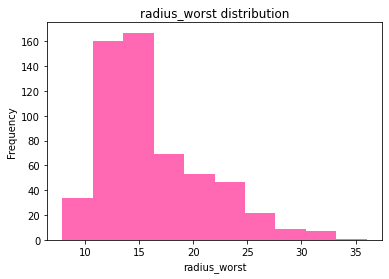

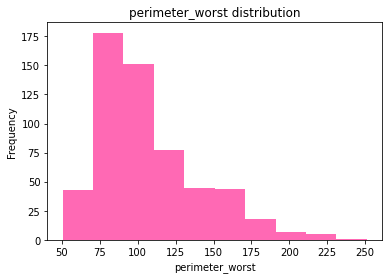

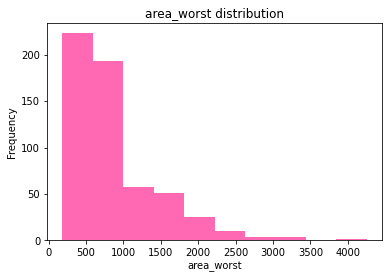

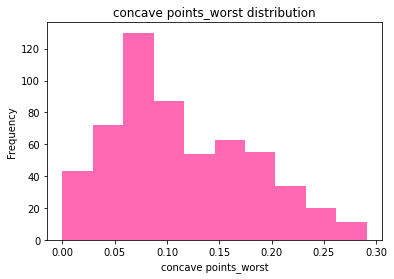

In [ ]:
for i in high_corr:
  df[i].plot.hist(color="hotpink")
  plt.xlabel(i)
  plt.title(i+" distribution")
  plt.show()

concave points_worst ditribution:

the values of the concave points_worst feature range from 0 to 0.291 
The most frequent values are between approximately 0.06 and 0.09 (almost 135 observation).
The least frequent values are between approximately 0.26 and 0.39 (almost 10 observations).

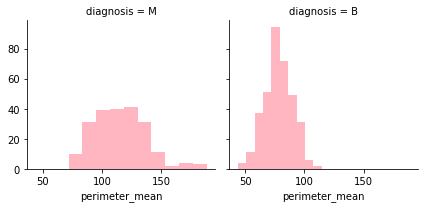

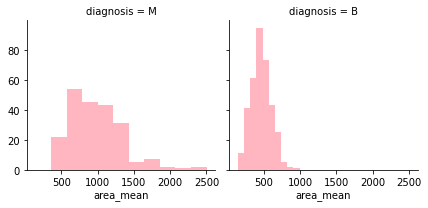

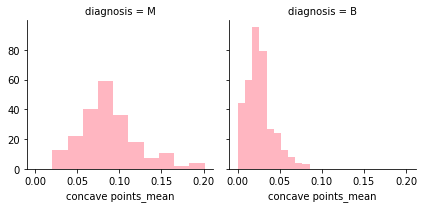

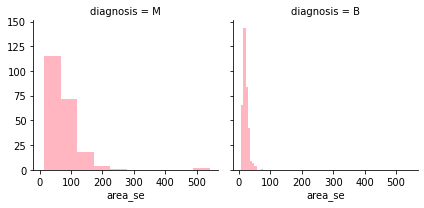

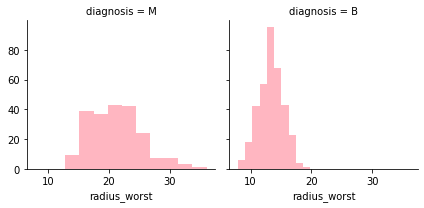

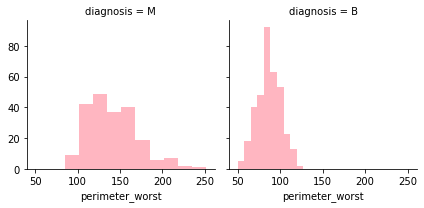

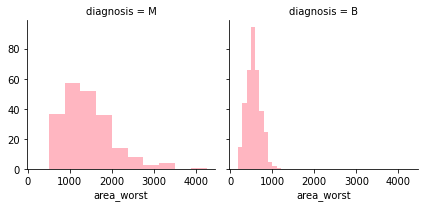

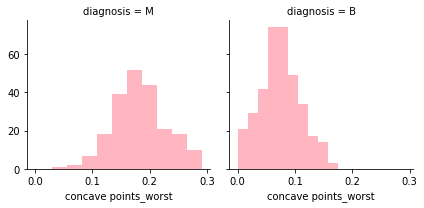

In [ ]:
for i in high_corr:
   g=sns.FacetGrid(df,col="diagnosis")
   g.map(plt.hist,i,color="lightpink")

**Correlation between concave points_worst and diagnosis:**

*concave points_worst ranges from 0 to almost 0.175 for the observations diagnosed as **Benign**. 
--The most frequent observations with  with beningn diagnosis (almost 80 observations) have concave points_worstare values that fall approximately between 0.05 and 0.1.
--The least frequent beningn diagnosis observations (almost 5 observations) have concave points_worstare approximately between 0.15 and 0.175

*concave points_worst ranges from approximately 0.03 to almost 0.28 for the observations diagnosed as **Melignant***.  
--The most frequent Melignant diagnosis observations (almost 50 observations) have concave points_worstare approximately between 0.15 and 0.18
--The least frequent Melignant diagnosis observations (less than 5 observations) have concave points_worstare approximately between 0.03 and 0.05

**Scatter Plots**

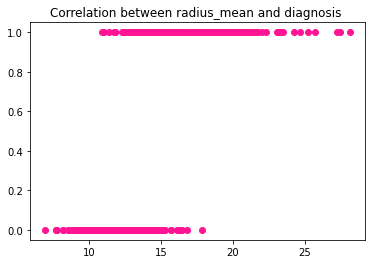

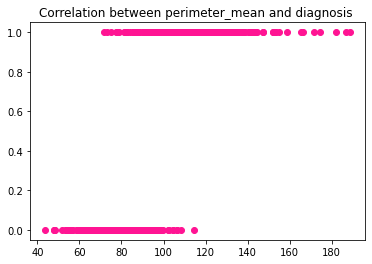

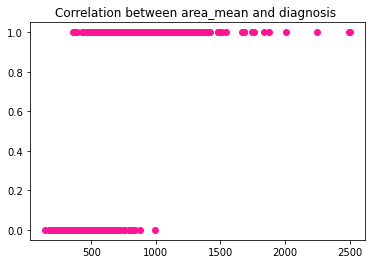

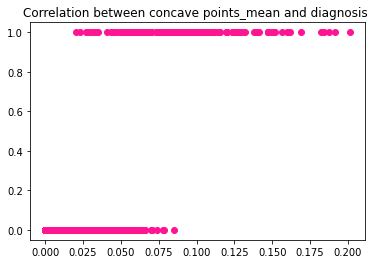

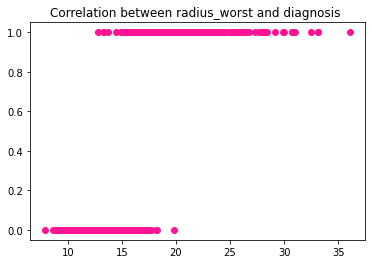

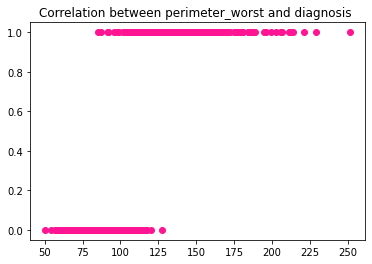

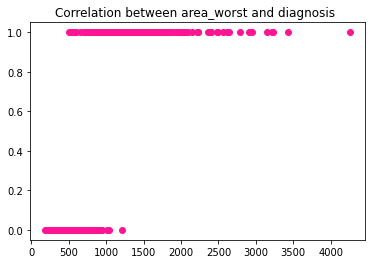

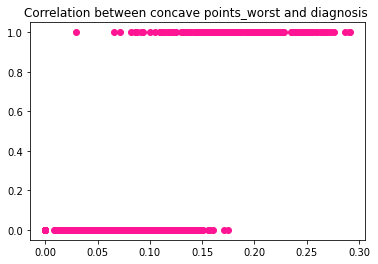

In [ ]:
for i in high_corr:
  x=df[i].values
  y=df["diagnosis"].values
  plt.plot(x,y,"bo",color="deeppink")
  plt.title("Correlation between " +i+" and diagnosis ")
  plt.show()

Interpretation:
Correlation between concave points_worst and diagnosis:
The obervations diagnosed as benign have concave points_worst values that fall approximately within the range of 0 and 0.18.
The obervations diagnosed as malignant have concave points_worst values that fall approximately within the range of 0.06 and 0.29

#Standardization

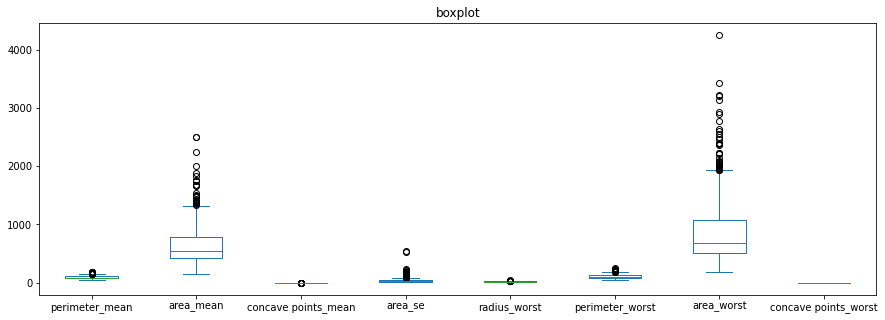

In [ ]:
#Boxplots of the features that are highly correlated with the target

# Set the figure size
plt.rcParams["figure.figsize"] = [15, 5]
# Plot the dataframe
ax = df[high_corr].plot(kind='box', title='boxplot')
# Display the plot
plt.show()


This graph shows that the variables don't have the same importance, but we know that this is not true since the features values have different scales, for instance area_worst ranges from 185.2 to 4254 but concave points_worst ranges from 0 to 0.29.
Therefore, in order to fix this, and to be able to use our classification models such as KNN and Logistic Regression, we have to standardize our data.


In [ ]:
#Standardization of all the features
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
#features
feat= df[f_names]
#standardized features
scaledx = scale.fit_transform(feat)
scaledx

array([[-2.07333501,  1.26993369,  0.9843749 , ...,  2.29607613,
         2.75062224,  1.93701461],
       [-0.35363241,  1.68595471,  1.90870825, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 0.45618695,  1.56650313,  1.55888363, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 2.0455738 ,  0.67267578,  0.57795264, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 2.33645719,  1.98252415,  1.73521799, ...,  2.28998549,
         1.91908301,  2.21963528],
       [ 1.22179204, -1.81438851, -1.34778924, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
#turning array scaledx into a dataframe
scaledx_df=pd.DataFrame(scaledx,columns=f_names)
scaledx_df.head()

,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


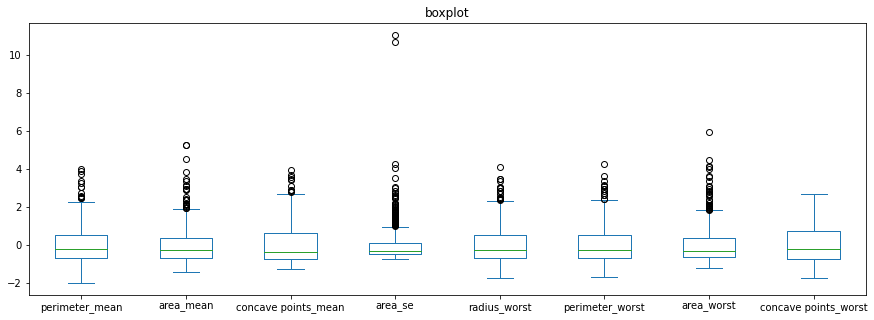

In [ ]:
#Boxplot of scaled features

# Plot the dataframe
ax = scaledx_df[high_corr].plot(kind='box', title='boxplot')
# Display the plot
plt.show()

#Classification Models

This part will be dedicated to run different machine learning classification models and evaluate their performance.

For our models we will use KNN with 10 neighbors, Logistic Regression, Decision Tree Classifier, Random Forest,XGBOOST and ADABOOST.
While building our models we will use the 30 present features first, then we will run them on the 8 features that are highly correlated with the target, which we have previously identified.

We will apply these machine learning algorithms in the following steps: 
 1. Importaning Relevant Libraries
 2. Identifying the features and the target variables
 3. Splitting the data into training set and test set 
 4. Building our model
 5. Training the model
 6. Predicting the classes for the test set
 7. Evaluating the classification accuracy

#KNN

We will use the k-nearest-neighbor algorithm to classify the diagnosis as Benign or Malignant based on the classification of 10 similiar in features observations (number of neighbors: k=10), found with the euclidean distance.

Then we will try different K on our model and evaluate its performance.

In [ ]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#Choosing the features and the target 
x=scaledx_df 
y=df['diagnosis']

In [ ]:
#Data splitting: 80% for training set and 20% for test test

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [ ]:
#building knn classifier with k=10
knn=KNeighborsClassifier(n_neighbors=10) 
#Fitting the training data
knn.fit(x_train,y_train) 
#Prediction
y_pred=knn.predict(x_test)  
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0])

**Plotting predicted values and actual values **



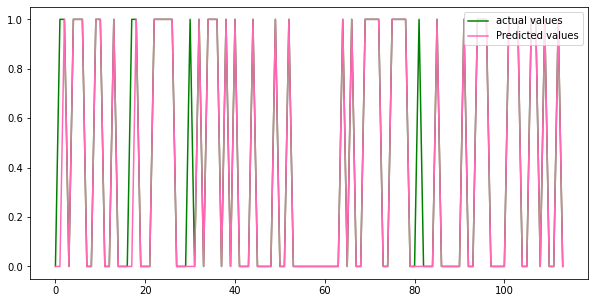

In [ ]:
# fitting the size of the plot
plt.figure(figsize=(10, 5))

# plotting the graphs
plt.plot([i for i in range(len(y_test))],y_test, label="actual values",color="green")
plt.plot([i for i in range(len(y_test))],y_pred, label="Predicted values",color="hotpink")


# showing the plotting
plt.legend(loc=1, prop={'size': 10})
plt.show()


**Accuracy**

In [ ]:
accuracy_all_features=[]
accuracy_high_corr=[]

In [ ]:
#Accuracy
acc_sc=round((accuracy_score(y_pred,y_test)*100),2)
print('Acuuracy=',acc_sc,"%")
accuracy_all_features.append(acc_sc)

Acuuracy= 96.49 %


Our KNN model with k=10 has a very good accuracy score of 96.49%.

**Confusion Matrix**

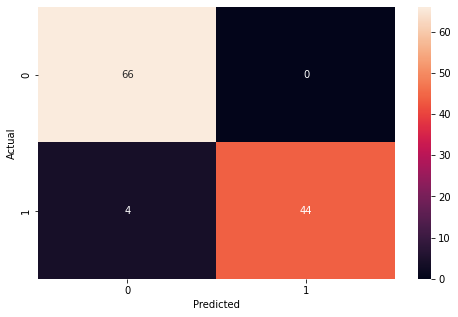

In [ ]:
plt.rcParams["figure.figsize"] = [8, 5]
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

*The value B (Benign) takes the number 0 (negative), and M (Malignant) takes the number 1 (positive).*

66 observations were predicted as Benign and were actually Benign. (66 true negative)

42 observations were predicted as Malignant and were actually Malignant. (42 true positive)

6 observations were predicted as Benign and were actually Malignant. (6 false negative)

0 observations were predicted as Malignant and were actually Benign. (0 false positive)

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        66
           1       1.00      0.92      0.96        48

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
#classification report using the formulas
TP=42
TN=66
FP=0
FN=6
print("Accuracy")
print("How many correct predictions have we made from all the observations?")
Accuracy = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy =",round(Accuracy,2))


print("Recall")
print("Out of all the observations that were Malignant , how many did we get correct?")
Recall = TP/(TP+FN)
print("Recall =",round(Recall,2))
print("Precision")
print("Out of all the observations that we predicted to be Malignant, how many did we actually get right?")
Precision= TP/(TP+FP)
print("Precision =",round(Precision,2))

Accuracy
How many correct predictions have we made from all the observations?
Accuracy = 0.95
Recall
Out of all the observations that were Malignant , how many did we get correct?
Recall = 0.88
Precision
Out of all the observations that we predicted to be Malignant, how many did we actually get right?
Precision = 1.0


Enter the maximum number of neighbors to try: 20
For k = 1  the accuracy score is:  93.86 %
For k = 2  the accuracy score is:  95.61 %
For k = 3  the accuracy score is:  95.61 %
For k = 4  the accuracy score is:  96.49 %
For k = 5  the accuracy score is:  95.61 %
For k = 6  the accuracy score is:  96.49 %
For k = 7  the accuracy score is:  96.49 %
For k = 8  the accuracy score is:  96.49 %
For k = 9  the accuracy score is:  95.61 %
For k = 10  the accuracy score is:  96.49 %
For k = 11  the accuracy score is:  96.49 %
For k = 12  the accuracy score is:  94.74 %
For k = 13  the accuracy score is:  94.74 %
For k = 14  the accuracy score is:  94.74 %
For k = 15  the accuracy score is:  94.74 %
For k = 16  the accuracy score is:  94.74 %
For k = 17  the accuracy score is:  94.74 %
For k = 18  the accuracy score is:  94.74 %
For k = 19  the accuracy score is:  94.74 %
For k = 20  the accuracy score is:  94.74 %


Text(0.5, 1.0, 'Different K and their accuracies')

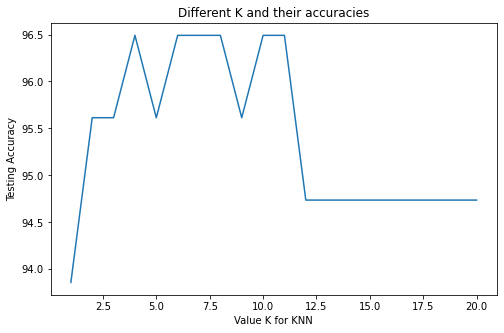

In [ ]:
#Trying different k and finding their accuracies
k=int(input("Enter the maximum number of neighbors to try: "))
acc=[]
for i in range(1,k+1):
  knn=KNeighborsClassifier(i)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  score=accuracy_score(y_pred,y_test)*100
  print("For k =",i," the accuracy score is: ", round(score,2),"%")
  acc.append(score)

#Plotting different K and their accuracies
plt.plot(range(1,k+1),acc)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')
plt.title("Different K and their accuracies")

**Using KNN with K=10 and only with the features that are highly correlated with the target**


In [ ]:
#Choosing the features and the target 
x=scaledx_df[high_corr] 
y=df['diagnosis']
#Data splitting: 80% for training set and 20% for test test

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)
#building knn classifier with k=10
knn=KNeighborsClassifier(n_neighbors=10) 
#Fitting the training data
knn.fit(x_train,y_train) 
#Prediction
y_pred=knn.predict(x_test)  
#Accuracy
acc_sc=round((accuracy_score(y_pred,y_test)*100),2)
print('Acuuracy=',acc_sc,"%")
accuracy_high_corr.append(acc_sc)

Acuuracy= 95.61 %


#LOGISTIC REGRESSION

The logistic regression model will be used to predict the probability of the target "Diagnosis" being Benign or Malignant  through a logistic function.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#Choosing the features and the target 
x=scaledx_df 
y=df['diagnosis']
#Data splitting 80% traing 20% testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

In [ ]:
#Building a logistic model
logreg = LogisticRegression()
#Fitting training data
logreg.fit(x_train, y_train)
#Predicting
predicted= logreg.predict(x_test)
predicted

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1])

In [ ]:
#Accuracy
acc_sc=round((accuracy_score(predicted,y_test)*100),2)
print('Acuuracy=',acc_sc,"%")
accuracy_all_features.append(acc_sc)

Acuuracy= 98.25 %


Our logistic regression model has a very good accuracy score of 98.25%.

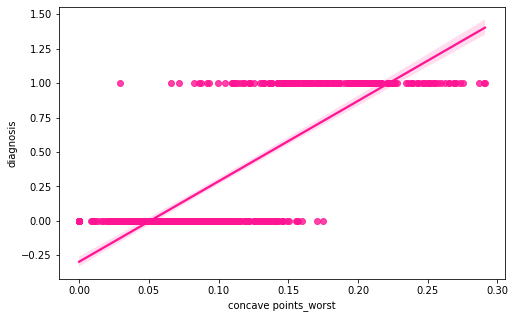

In [ ]:
#Logistic regression of Diagnosis with x=radius_mean 
sns.regplot(x='concave points_worst',y='diagnosis',data=df,color="deeppink")

p>0.5 => malignant 
p<0.5 => benign

**Confusion Matrix**

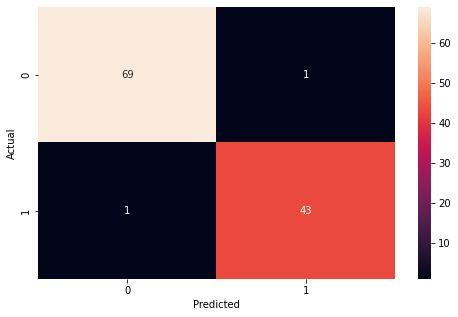

In [ ]:
confusion_matrix = pd.crosstab(y_test, predicted, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

*the value B (Benign) takes the number 0 (negative), and M (Malignant) takes the number 1 (positive).*

69 observations were predicted as Benign and were actually Benign. (69 true negative)
43 observations were predicted as Malignant and were actually Malignant. (43 true positive)
1 observation was predicted as Benign and were actually Malignant. (1 false negative)
1 observation was predicted as Malignant and were actually Benign. (1 false positive)

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        70
           1       0.98      0.98      0.98        44

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114




Accuracy = 0.98
we made 98% correct predictions from all the observations
For 1 (Malignant): 
Recall = 0.98
Out of all the observations that were Malignant,we got 98% correct.

Precision =0.98
Out of all the observations that we predicted to be Malignant, we got 98% correct.


**Using Logistic Regression Model only with the features that are highly correlated with the target**


In [ ]:
#Choosing the features and the target 
x=scaledx_df[high_corr] 
y=df['diagnosis']
#Data splitting: 80% for training set and 20% for test test

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)
#Building a logistic model
logreg = LogisticRegression()
#Fitting training data
logreg.fit(x_train, y_train)
#Predicting
predicted= logreg.predict(x_test) 
#Accuracy
acc_sc=round((accuracy_score(predicted,y_test)*100),2)
print('Acuuracy=',acc_sc,"%")
accuracy_high_corr.append(acc_sc)

Acuuracy= 96.49 %


#Decision Tree Classifier

In this part we will build a decision tree using the 30 present features (but a maximum depth of 10) and then using the 8 features that are highly correlated with the target "Diagnosis".
We will also interpret some of the homogeneity levels meaured by the gini coefficient that was obtained from the split on the features.

In [ ]:
#Importing relevant libraries
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier



In [ ]:
#features and target
x=df[f_names]
y=df["diagnosis"]

Acuuracy= 95.61 %


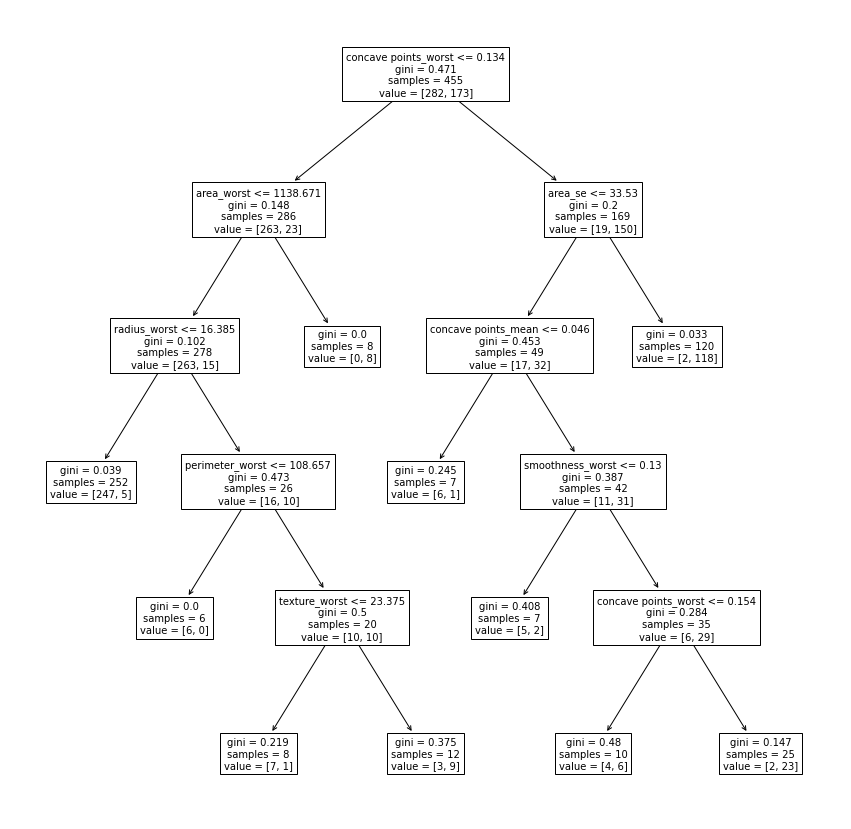

In [ ]:
#splitting data 20% test 80% training
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

dtree = DecisionTreeClassifier(criterion="gini",splitter='random',max_leaf_nodes=10,min_samples_leaf=5, max_depth=10)
#training the model
dtree = dtree.fit(x_train, y_train)
#predicting
y_pred=dtree.predict(x_test) 

plt.figure(figsize=(15,15))
tree.plot_tree(dtree, feature_names=f_names,fontsize=10 )
acc_sc=round((accuracy_score(y_pred,y_test)*100),2)
print('Acuuracy=',acc_sc,"%")


Brief Explanation:
Line 1:
testing perimiter_mean 
our training set (455 observations) contains 282 benign and 173 malignant 
gini=0.471 
very close to 0.5=> the split is done almost in the middle

Line2 :(on the left) :testing concave_points mean
the 324 obervations that have perimiter_mean<720.153 contains 276 benign and 48 malignant 
gini has decreased to 0.252 
in the next lines (following this last split and staying on the left)
compactness_mean 
then testing perimiter_mean again 
and for the observations with perimiter_mean<=619.945
we get gini=0.032 => very close to 0 now the data almost belongs to the same class (239 benign and only 4 malignant observations)

Accuracy score:
The accuracy score will keep changing because the  answer from the decision tree model will keep changing based on probabailities.

Acuuracy= 95.61 %


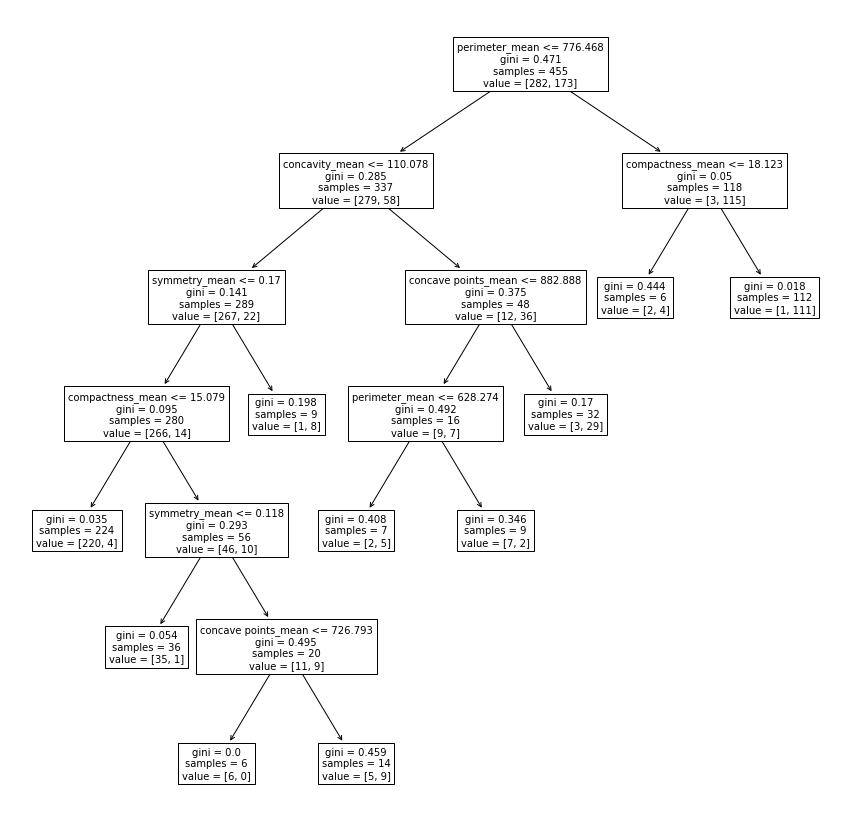

In [ ]:
#changing the parameters
#features and target
x=df[high_corr]
y=df["diagnosis"]
#splitting data 20% test 80% training
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

dtree = DecisionTreeClassifier(criterion="gini",splitter='random',max_leaf_nodes=10,min_samples_leaf=5, max_depth=10)
#training the model
dtree = dtree.fit(x_train, y_train)
#predicting
y_pred=dtree.predict(x_test) 

plt.figure(figsize=(15,15))
tree.plot_tree(dtree, feature_names=f_names,fontsize=10 )
acc_sc=round((accuracy_score(y_pred,y_test)*100),2)
print('Acuuracy=',acc_sc,"%")

first line 
we get gini=0.02 for the 97 observations with values >0.083 when we split on area_mean and get 1 benign observation and 96 malignant. (almost homogeneous sample )
last line
gini= 0.0 =>completely homogeneous sample for 12 observations that are benign
after testing area_mean , compactness_mean, perimiter_mean, radius_mean, concavity_mean, concave_points mean 

#Random Forest

Another classification algorithm that we're going to use is Random Forest Classifier, which will improve the accuracy of the model and decrease overfitting, by taking the class of the majority vote of classifications from different decision trees that were run on different samples from our data.  

In [ ]:
#Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier 

In [ ]:
#features and target
x=df[f_names]
y=df["diagnosis"]
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)
#Creating a random forest with 10 decision trees
clf=RandomForestClassifier(n_estimators=10)  
#Training our model
clf.fit(x_train, y_train) 
#Predicting
y_pred=clf.predict(x_test) 
#Measuring the accuracy of our model 
acc_sc=round((accuracy_score(y_pred,y_test)*100),2)
print('Acuuracy=',acc_sc,"%")

Acuuracy= 96.49 %


Same as the decision tree model, we get different accuracy scores from the random forest model which since it uses randomization.

#XGBOOST

This algorithm will use sequentially-built weak decision trees to find the best tree model.

In [ ]:
#loading packages
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from numpy import nan

In [ ]:
#features and target
x=df[f_names]
y=df["diagnosis"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [ ]:
#Building the model
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)
#Fitting
model.fit(x_train, y_train)

#Generate predictions
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1])

In [ ]:
#Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy= "+str(round(accuracy*100,2))+"%")
accuracy_all_features.append(round(accuracy*100,2))

Accuracy= 96.49%


Our XGBOOST model has a very good accuracy score of 96.49%.

**Confusion Matrix**

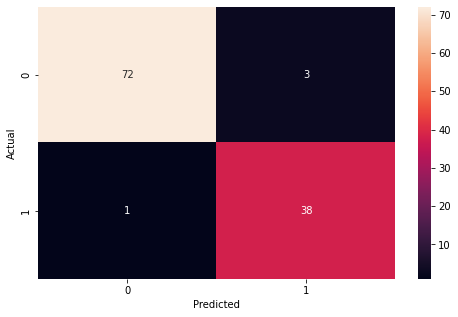

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

*the value B (Benign) takes the number 0 (negative), and M (Malignant) takes the number 1 (positive).*

72 observations were predicted as Benign and were actually Benign. (72 true negative)
38 observations were predicted as Malignant and were actually Malignant. (38 true positive)
1 observation was predicted as Benign and was actually Malignant. (1 false negative)
3 observations predicted as Malignant and were actually Benign. (3 false positive)

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        75
           1       0.93      0.97      0.95        39

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



Accuracy = 0.96
we made 96% correct predictions from all the observations
For 1 (Malignant): 
Recall = 0.93
Out of all the observations that were Malignant,we got 93% correct.
(93% from all malignant)
Precision =0.97
Out of all the observations that we predicted to be Malignant, we got 97% correct.
(97% from all malignant predictions)

**Using XGBOOST model only with the features that are highly correlated with the target**

In [ ]:
#features and target
x=df[high_corr]
y=df["diagnosis"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
#Building the model
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)
#Fitting
model.fit(x_train, y_train)

#Generate predictions
y_pred = model.predict(x_test)
#Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy= "+str(round(accuracy*100,2))+"%")
accuracy_high_corr.append(round(accuracy*100,2))

Accuracy= 94.74%


#AdaBoost

This boosting algorithm will be used to reduce overfitting and error by combining different classifiers, learning from their mistakes and turning them into a stronger one.

In [ ]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [ ]:
#features and target
x_ada=df[f_names]
y_ada=df["diagnosis"]
#training set and testing set
x_train, x_test, y_train, y_test = train_test_split(x_ada, y_ada, test_size=0.2, random_state=10)

In [ ]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

In [ ]:
#Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy= "+str(round(accuracy*100,2))+"%")
accuracy_all_features.append(round(accuracy*100,2))

Accuracy= 96.49%


**Confusion Matrix**

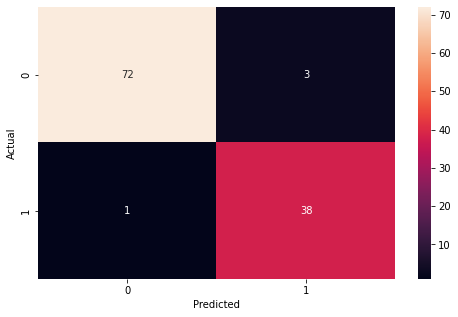

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

*the value B (Benign) takes the number 0 (negative), and M (Malignant) takes the number 1 (positive).*

72 observations were predicted as Benign and were actually Benign. (72 true negative)
38 observations were predicted as Malignant and were actually Malignant. (38 true positive)
1 observation was predicted as Benign and was actually Malignant. (1 false negative)
3 observations predicted as Malignant and were actually Benign. (3 false positive)

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        75
           1       0.93      0.97      0.95        39

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



We got the same accuracy, precision and recall results from the AdaBoost model as the XGBoost model

**Using AdaBoost model with only the features that are highly correlated with the target**

In [ ]:
#features and target
x_ada=df[high_corr]
y_ada=df["diagnosis"]
#training set and testing set
x_train, x_test, y_train, y_test = train_test_split(x_ada, y_ada, test_size=0.2, random_state=10)
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)
#Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy= "+str(round(accuracy*100,2))+"%")
accuracy_high_corr.append(round(accuracy*100,2))

Accuracy= 94.74%


#Models Accuracy Comparison

Finally we will compare the classification accuracy between the models, and when reducing the number of features.

We won't be comparing with the decision tree and random forest models which give varying accuracies.

In [ ]:
accuracies=[accuracy_all_features,accuracy_high_corr]
models=["KNN","Logistic Regression","XGBOOST","AdaBoost"]

In [ ]:
df_acc = pd.DataFrame(accuracies, index =['All Features','High Correlation Features'],
                                              columns =models)

In [ ]:
df_acc

,KNN,Logistic Regression,XGBOOST,AdaBoost
All Features,96.49,98.25,96.49,96.49
High Correlation Features,95.61,95.61,94.74,94.74


When we used all the features in our models, the **logistic regression** model gave the most accurate classification (ccuracy =98.25%) and KNN, XGBOOST and AdaBoost gave almost the same accuracies of 96.49%.

When we only used the features that are highly correlated with the target, the best model that gave the highest classification accuracy were **KNN and Logistic Regression** with accuracies equal to 97.37%.

But we can see that decreasing the number of features has improved the performance of the KNN model (accuracy went from 96.47% to 97.37%) but reduced the performance of all the other models; for logistic regression the accuracy went from 98.25% to 97.37%, as for the XGBOOST model, the accuracy went from 96.49% to 95.61%, and finally the the Adaboost model accuracy was 96.49% when we used all the features but was reduced to 92.98% when we used only the features that are highly correlated with the target 'Diagnosis'.

#Conclusion

In this project, we used the Cancer Wisconsin (Diagnostic) Data Set, which contains a list of biopsies and measurements of digitized cell nucleis, to predict whether a diagnosis is Benign or Malignant, through various machine learning algorithms.